In [1]:
%load_ext autoreload

In [121]:
%autoreload 2
import numpy as np
from scipy.stats import unitary_group, ortho_group
from scipy.linalg import khatri_rao
import matplotlib.pyplot as plt

In [137]:
n = 60
B = np.random.normal(size = (n, n * n))
u, _, vT = np.linalg.svd(B, full_matrices=False)
sigma = np.logspace(3, 4 - n, base=1.5, num=n)
print(u.shape)
print(v.shape)
print(sigma.shape)
A = u @ np.diag(sigma) @ vT

(60, 60)
(60, 3600)
(60,)


In [38]:
A.shape

(30, 900)

In [78]:
def gauss(x, r, seed):
    np.random.seed(seed)
    return np.random.normal(size = (x, r))

def radem(x, r, seed):
    np.random.seed(seed)
    return 1 - 2 * np.random.randint(low = 0, high = 2, size = (x, r))

def big_gauss(x, r, seed):
    np.random.seed(seed)
    return np.random.normal(size = (x * x, r))

def big_radem(x, r, seed):
    np.random.seed(seed)
    return 1 - 2 * np.random.randint(low = 0, high = 2, size = (x * x, r))

def gauss_gauss(x, r, seed):
    return khatri_rao(gauss(x, r, seed=2 * seed), gauss(x, r, seed=2 * seed + 1))

def gauss_radem(x, r, seed):
    return khatri_rao(gauss(x, r, seed=2 * seed), radem(x, r, seed=2 * seed + 1))

def radem_radem(x, r, seed):
    return khatri_rao(radem(x, r, seed=2 * seed), radem(x, r, seed=2 * seed + 1))

In [144]:
answer = []

for generator, name in zip([big_gauss, big_radem, gauss_gauss, gauss_radem, radem_radem], ['big_gauss', 'big_radem', 'gauss_gauss', 'gauss_radem', 'radem_radem']):
    for seed in range(1, 101):
        for r in [12, 15, 18, 21, 24, 27]:
            Omega = generator(n, r + 2, seed)
            Q, R = np.linalg.qr(A @ Omega)
            B = Q @ (Q.T @ A)
            C = u[:,:r] @ np.diag(sigma[:r]) @ vT[:r, :]
            answer.append((r, np.linalg.norm(B - C) / np.linalg.norm(B), name))

df = pd.DataFrame(answer, columns=["rank", "precision", "generator_name"])

In [127]:
import seaborn as sns

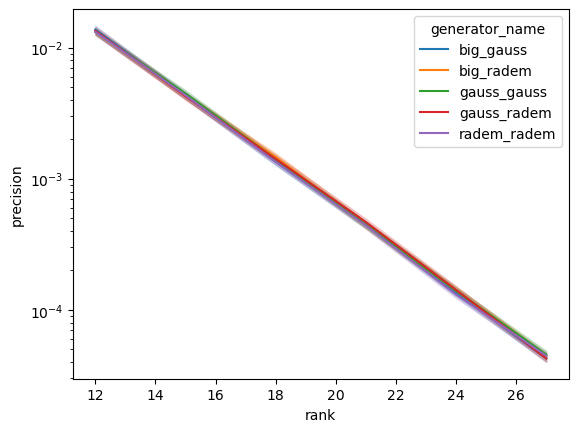

In [152]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(data=df, x='rank', y='precision', hue='generator_name', ax=ax)
ax.set_yscale('log')